## Linear Regression on `adult.csv`

In [1]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

### Explore the data

<Axes: >

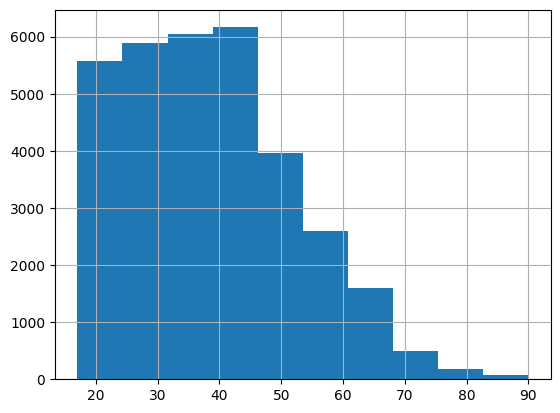

In [3]:
df['age'].hist()

<Axes: xlabel='target'>

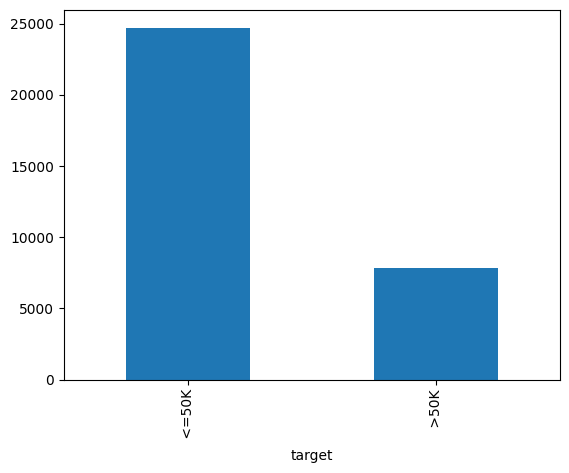

In [4]:
df['target'].value_counts().plot(kind='bar')

<Axes: xlabel='workclass'>

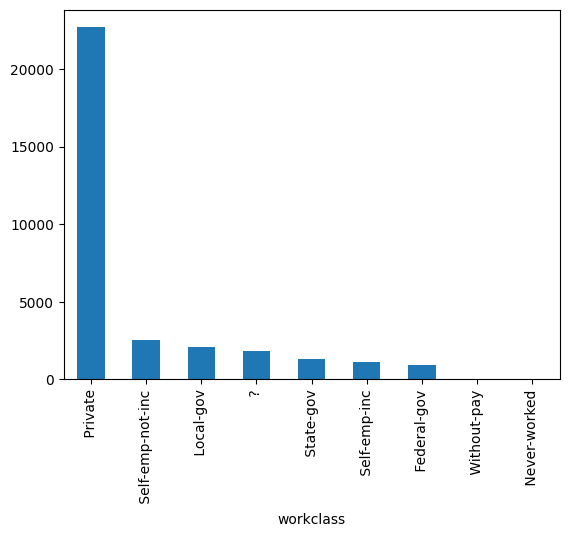

In [5]:
df['workclass'].value_counts().plot(kind='bar')

In [6]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Remove the Missing Values

In [7]:
# replace ' ?' with 'Unknown'
df['workclass'] = df['workclass'].replace(' ?', 'Unknown')
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Splitting features and target label

In [8]:
x = df.drop('target', axis=1)
y = df['target']

print(f"Shape of x = {x.shape} and y = {y.shape}")

Shape of x = (32561, 14) and y = (32561,)


### Splitting training and testing data - 75 % for training 25 % for testing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25)

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (24420, 14)
x_test: (8141, 14)
y_train: (24420,)
y_test: (8141,)


In [10]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
27903,66,Local-gov,362165,Bachelors,13,Widowed,Prof-specialty,Not-in-family,Black,Female,0,2206,25,United-States
14848,33,Private,159888,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
21865,63,Private,301108,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,22,United-States
4948,60,Federal-gov,21876,Some-college,10,Divorced,Prof-specialty,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States
26698,36,Private,273604,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States


In [11]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29771,59,Private,158813,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States
24550,28,Private,339372,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,1408,40,United-States
29404,48,Private,125120,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,55,United-States
23358,37,Private,192939,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
23383,30,Private,94413,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,30,United-States


### Standardize the data

In [12]:
# Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_attributes = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attributes = x_train.select_dtypes(include=['object']).columns

ct = ColumnTransformer([
    ('standar_sclaer', StandardScaler(), numerical_attributes),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
]).fit(x_train)

transformed_x_train = ct.transform(x_train)
transformed_x_test = ct.transform(x_test)

transformed_x_train, transformed_x_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 341880 stored elements and shape (24420, 108)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 113974 stored elements and shape (8141, 108)>)

### Dimensionality Reduction using PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(transformed_x_train)

x_train_pca = pca.transform(transformed_x_train)
x_test_pca = pca.transform(transformed_x_test)

In [14]:
x_train_pca, x_test_pca

(array([[ 1.4590032 ,  0.08914927],
        [-0.01418635, -0.56172095],
        [-0.1377159 , -2.13066004],
        ...,
        [ 1.11510905, -1.90876808],
        [ 0.67697232,  1.53516162],
        [ 0.57251848, -0.57648595]], shape=(24420, 2)),
 array([[ 1.86998538, -0.95696011],
        [ 0.27331719,  1.78348882],
        [ 0.4625635 , -0.24255351],
        ...,
        [ 1.58474617, -1.44231688],
        [-1.51449574, -0.45382202],
        [ 0.11927267, -0.46716244]], shape=(8141, 2)))

### Linear and Logistic Regression

In [15]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression

# Initialize the Linear Regression model
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()

# Fit the model to your training data
linear_regression.fit(transformed_x_train, y_train)
logistic_regression.fit(transformed_x_train, y_train)

# Make predictions using the fitted model
y_test_pred_linear = linear_regression.predict(transformed_x_test)
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)

In [16]:
print(f"Score for Linear Regression: {linear_regression.score(transformed_x_test, y_test)}")
print(f"Score for Logistic Regression: {logistic_regression.score(transformed_x_test, y_test)}")

Score for Linear Regression: 0.3692773681893582
Score for Logistic Regression: 0.854071981329075


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred_linear)
mse = mean_squared_error(y_test, y_test_pred_linear)
r2 = r2_score(y_test, y_test_pred_linear)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.2631165289521437
Mean Squared Error (MSE): 0.11613098054599967
R-squared (R²): 0.3692773681893582


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
class_report = classification_report(y_test, y_test_pred_logistic)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.854071981329075
Confusion Matrix:
[[5740  420]
 [ 768 1213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6160
           1       0.74      0.61      0.67      1981

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.85      0.85      8141



### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to your training data
naive_bayes.fit(transformed_x_train.toarray(), y_train)

# Make predictions using the fitted model
y_test_pred_naive_bayes = naive_bayes.predict(transformed_x_test.toarray())

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_naive_bayes)
conf_matrix = confusion_matrix(y_test, y_test_pred_naive_bayes)
class_report = classification_report(y_test, y_test_pred_naive_bayes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.5444048642672891
Confusion Matrix:
[[2541 3619]
 [  90 1891]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.41      0.58      6160
           1       0.34      0.95      0.50      1981

    accuracy                           0.54      8141
   macro avg       0.65      0.68      0.54      8141
weighted avg       0.81      0.54      0.56      8141



### SVM

In [21]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to your transformed training data
svm_classifier.fit(transformed_x_train, y_train)

# Make predictions using the fitted classifier
y_test_pred_svm = svm_classifier.predict(transformed_x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_svm)
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
class_report = classification_report(y_test, y_test_pred_svm)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8573885272079597
Confusion Matrix:
[[5800  360]
 [ 801 1180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6160
           1       0.77      0.60      0.67      1981

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



### Comparing the performance of different models

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
svm_classifier = SVC()
decisition_tree_classifiiers = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()

# Fit the models
linear_regression.fit(transformed_x_train, y_train)
logistic_regression.fit(transformed_x_train, y_train)
naive_bayes.fit(transformed_x_train.toarray(), y_train)
svm_classifier.fit(transformed_x_train, y_train)
decisition_tree_classifiiers.fit(transformed_x_train, y_train)
knn_classifier.fit(transformed_x_train, y_train)

# Make predictions
y_test_pred_linear = linear_regression.predict(transformed_x_test)
y_test_pred_logistic = logistic_regression.predict(transformed_x_test)
y_test_pred_naive_bayes = naive_bayes.predict(transformed_x_test.toarray())
y_test_pred_svm = svm_classifier.predict(transformed_x_test)
y_test_pred_decision_tree = decisition_tree_classifiiers.predict(transformed_x_test)
y_test_pred_knn = knn_classifier.predict(transformed_x_test)

y_test_pred_liner_binary = (y_test_pred_linear > 0.5).astype(int)

# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_test_pred_liner_binary)
accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
accuracy_naive_bayes = accuracy_score(y_test, y_test_pred_naive_bayes)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
accuracy_decision_tree = accuracy_score(y_test, y_test_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

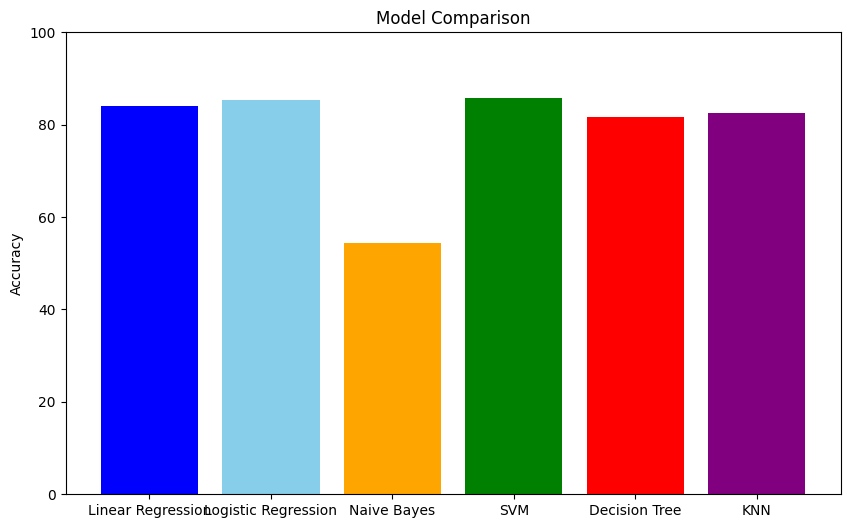

In [28]:
# Plot the accuracies
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN']
accuracies = list(map(lambda x: round(x * 100, 2), [accuracy_linear, accuracy_logistic, accuracy_naive_bayes, accuracy_svm, accuracy_decision_tree, accuracy_knn]))

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'skyblue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.title('Model Comparison')
plt.show()